## Data Labelling Part ii

In this  part of data labeling I want to use the dataset that I exported from the notebook before to label the data based on the decisions that we made.

The data that I am using is already encoded using pd.get_dummies :: this means there are going to be more, so I will have to sort through the variables.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
dat = pd.read_csv("draft2.csv")

In [3]:
#let's check the shape of the data
dat.shape

(2310, 363)

<AxesSubplot:>

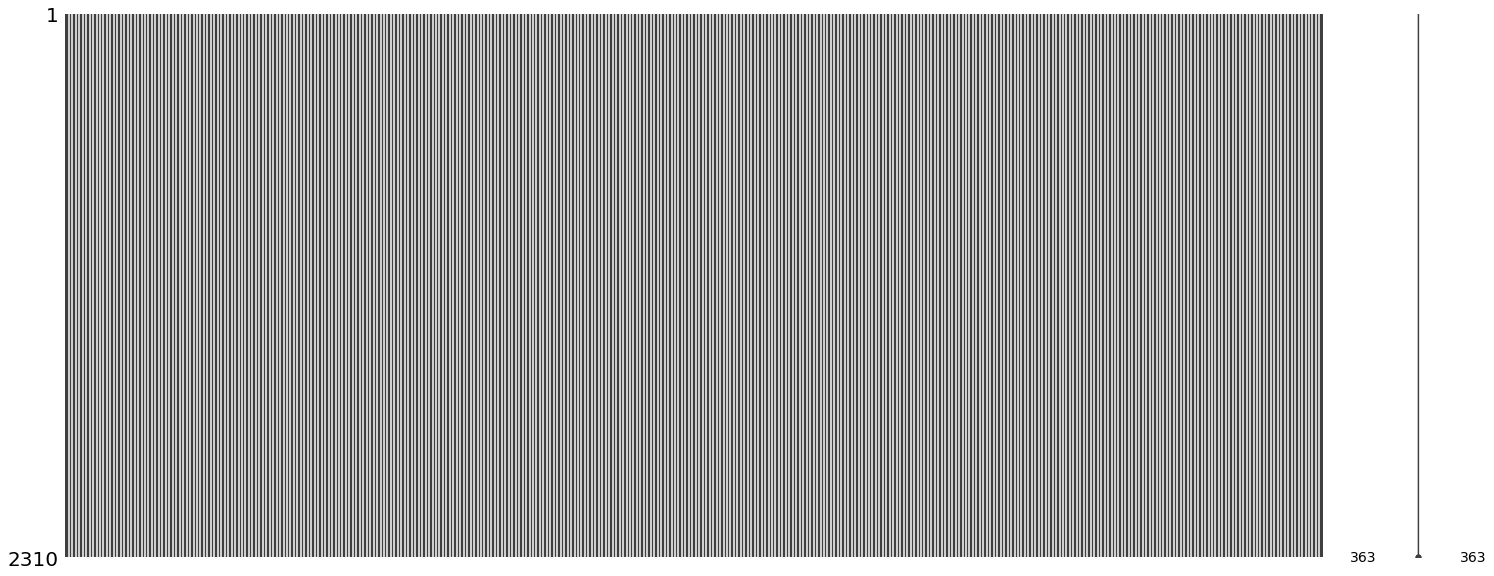

In [4]:
#as you can see the amount of variables has increased due to the encoding

#let's look  and check if the data no-longer has any gaps of missing information
import missingno as mno

mno.matrix(dat)

#so we can see that there is no more data that is missing everything has been filled 
#the method used to fill the data is a statistical method called MICE

In [5]:
dat.head(10)

,Highest year of education completed,Wealth_index,Age_at_first_sex,current_age,month_of_birth,year_of_birth,time_to_water_source,number_of_household_members,age_of_household_head,number_of_trips_last12month,...,who_can_give_u_hiv_commercial sex partner,who_can_give_u_hiv_don't know,who_can_give_u_hiv_spouse,who_can_give_u_hiv_stranger,respondent_circumised_no,respondent_circumised_yes,paid_for_sex_last_12months_no,paid_for_sex_last_12months_yes,Gender_Female,Gender_Male
0,1.0,2.0,20.0,25.0,7.0,1985.0,39.781259,1.0,26.0,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,2.0,20.0,25.0,7.0,1985.0,39.781232,1.0,26.0,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,2.0,20.0,25.0,7.0,1985.0,39.781267,1.0,26.0,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,2.0,20.0,25.0,7.0,1985.0,39.781268,1.0,26.0,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2.0,2.0,20.0,25.0,7.0,1985.0,39.781259,1.0,26.0,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,1.0,2.0,20.0,25.0,7.0,1985.0,39.781292,1.0,26.0,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,5.0,2.0,20.0,25.0,7.0,1985.0,39.781266,1.0,26.0,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,6.0,5.0,15.0,18.0,10.0,1992.0,60.000000,11.0,34.0,8.254438,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
8,5.0,5.0,15.0,18.0,10.0,1992.0,60.000000,11.0,34.0,8.254435,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
9,3.0,5.0,15.0,18.0,10.0,1992.0,60.000000,11.0,34.0,8.254362,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [6]:
#drop duplicates in the data
dat.drop_duplicates(subset=["Wealth_index","current_age","month_of_birth","age_of_household_head"],inplace =True)

In [7]:
#we have the blood test results in the data, I need to remove it so that we will check later how it works out.
#let us take this column out for comparison later
hiv = dat[["blood_test_result"]]
dat.drop(columns="blood_test_result", inplace = True)

In [8]:
hiv.to_csv("hiv_blood.csv",index=False)

## Variables to use in labelling.

There are particular variables that we will need to consider when labelling the data

These include variables:

- Syphilis Result.
- Last_partner_HIV_Status.
- Used_condom.
- Paid_for_sex.
- Smoking and drugs

In [11]:
dat.head()

,Highest year of education completed,Wealth_index,Age_at_first_sex,current_age,month_of_birth,year_of_birth,time_to_water_source,number_of_household_members,age_of_household_head,number_of_trips_last12month,...,who_can_give_u_hiv_commercial sex partner,who_can_give_u_hiv_don't know,who_can_give_u_hiv_spouse,who_can_give_u_hiv_stranger,respondent_circumised_no,respondent_circumised_yes,paid_for_sex_last_12months_no,paid_for_sex_last_12months_yes,Gender_Female,Gender_Male
0,1.000000,2.0,20.0,25.0,7.0,1985.0,39.781259,1.0,26.0,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,6.000000,5.0,15.0,18.0,10.0,1992.0,60.000000,11.0,34.0,8.254438,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
15,1.000000,5.0,18.0,26.0,7.0,1984.0,20.000000,4.0,27.0,17.234600,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
29,2.801344,1.0,15.0,44.0,12.0,1966.0,40.000000,8.0,40.0,2.000000,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
37,3.000000,5.0,17.0,21.0,8.0,1989.0,90.000000,5.0,27.0,-2.079821,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [12]:
dat.syplilis_result.value_counts()

0.0    245
1.0      7
Name: syplilis_result, dtype: int64

In [13]:
dat.used_condom_last_sex_yes.value_counts()

0.0    230
1.0     22
Name: used_condom_last_sex_yes, dtype: int64

In [14]:
dat.Had_genital_discharge_in_last_12_months.value_counts()

0.0    240
1.0     12
Name: Had_genital_discharge_in_last_12_months, dtype: int64

In [15]:
dat.paid_for_sex_last_12months_yes.value_counts()

0.0    249
1.0      3
Name: paid_for_sex_last_12months_yes, dtype: int64

In [16]:
#dat.Smokes_cigarettes.value_counts()

In [17]:
#dat.Smokes_pipe.value_counts()

```
data.loc[(data.syplilis_result == 0) & (data.last_partner_hiv_status == 'negative') & (data.used_condom_last_sex == "yes") & (data.Paid_for_sex_in_last_12_months == 0), 'label' ] = 'No'
data.loc[(data.syplilis_result == 1) & (data.last_partner_hiv_status == 'negative') & (data.used_condom_last_sex == "yes") & (data.Paid_for_sex_in_last_12_months == 0), 'label' ] = 'No'
```

In [18]:
#lets pull out the variables we are going to deal with 
dat[['syplilis_result','used_condom_last_sex_yes','Had_genital_discharge_in_last_12_months','paid_for_sex_last_12months_yes']].to_csv("label_process.csv", index=False)

In [19]:
dat.syplilis_result = dat.syplilis_result.astype(int)
dat.used_condom_last_sex_yes = dat.used_condom_last_sex_yes.astype(int)
dat.Had_genital_discharge_in_last_12_months = dat.Had_genital_discharge_in_last_12_months.astype(int)
dat.paid_for_sex_last_12months_yes = dat.paid_for_sex_last_12months_yes.astype(int)


In [20]:
# this is the new way of labelling the data i reduced the variables.
# I consulted with Dr. Stella to demistify some of the assumptions I had made in choosing variables
# In the same context I have realized that the variable of syphilis is not a direct variable par se
# There are variations of how it tested and the results need particular interpretation.
# As a result its better to look at it distinctly.

dat.loc[(dat.syplilis_result == 0) & (dat.used_condom_last_sex_yes == 1) & (dat.paid_for_sex_last_12months_yes==1), 'label'] = 0 
dat.loc[(dat.syplilis_result == 0) & (dat.used_condom_last_sex_yes == 0) & (dat.paid_for_sex_last_12months_yes==1), 'label'] = 1 
dat.loc[(dat.syplilis_result == 1) & (dat.used_condom_last_sex_yes == 1) & (dat.paid_for_sex_last_12months_yes==1), 'label'] = 0
dat.loc[(dat.syplilis_result == 1) & (dat.used_condom_last_sex_yes == 0) & (dat.paid_for_sex_last_12months_yes==1), 'label'] = 1 
dat.loc[(dat.syplilis_result == 0) & (dat.used_condom_last_sex_yes == 1) & (dat.paid_for_sex_last_12months_yes==0), 'label'] = 0
dat.loc[(dat.syplilis_result == 0) & (dat.used_condom_last_sex_yes == 0) & (dat.paid_for_sex_last_12months_yes==0), 'label'] = 1 
dat.loc[(dat.syplilis_result == 1) & (dat.used_condom_last_sex_yes == 1) & (dat.paid_for_sex_last_12months_yes==0), 'label'] = 0 
dat.loc[(dat.syplilis_result == 1) & (dat.used_condom_last_sex_yes == 0) & (dat.paid_for_sex_last_12months_yes==0), 'label'] = 1 


(dat.syplilis_result == )
(dat.used_condom_last_sex_yes == )
(dat.Had_genital_discharge_in_last_12_months == )
(dat.paid_for_sex_last_12months_yes == )

dat.loc[,'label'] = "Yes"

### Labelled data.

I want to check and see if all the rows have been labelled.

From below we can see that the data is not balanced, so we may need to use a synthetic way to create more data points so that we can have something to work with.

I am thinking of SMOTE but i will consult with the team to see what they thing.

- [SMOTE](https://github.com/VVVENIIDIICI/Class-Imbalance#smote)

This is normally something normal for datasets that are health related.

In [21]:
dat.label.value_counts()

1.0    230
0.0     22
Name: label, dtype: int64

In [22]:
dat.filter(like = "partner")

,sexualpartners_excludingspouse,sexualpartners_includinspouse,total_life_time_number_of_partners,Age_of_wife/partner,Currently_residing_with_wife/partner,Wife/partner_jealous_if_respondent_talks_with_other_women,Wife/partner_accuses_respondent_of_unfaithfulness,Wife/partner_does_not_permit_respondent_to_meet_female_friends,Wife/partner_tries_to_limit_respondent's_contact_with_family,Wife/partner_insists_on_knowing_where_respondent_is,...,last_sexual_partner_boyfriend not living with respondent,last_sexual_partner_casual acquaintance,last_sexual_partner_live-in partner,last_sexual_partner_spouse,alchoholconsumption_last_sex_partner drunk only,last_partner_hiv_status_don't know,last_partner_hiv_status_negative,last_partner_hiv_status_positive,last_partner_hiv_status_refused to answer,who_can_give_u_hiv_commercial sex partner
0,1.0,1.0,3.0,26.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,0.0,0.0,1.0,34.867213,0.573811,1.772499,5.767366,2.047440,0.200607,5.475214,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
15,0.0,2.0,4.0,32.000000,1.000000,2.251426,-1.998357,-0.071617,-2.049458,3.050351,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
29,0.0,1.0,2.0,26.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
37,0.0,1.0,2.0,29.641950,1.125059,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2252,0.0,1.0,2.0,26.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2254,2.0,3.0,12.0,22.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2260,0.0,1.0,4.0,25.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2278,0.0,1.0,2.0,28.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [23]:
dat[['syplilis_result','label','total_life_time_number_of_partners']]

,syplilis_result,label,total_life_time_number_of_partners
0,0,0.0,3.0
7,0,1.0,1.0
15,0,1.0,4.0
29,0,1.0,2.0
37,0,0.0,2.0
...,...,...,...
2252,0,1.0,2.0
2254,0,1.0,12.0
2260,0,1.0,4.0
2278,0,1.0,2.0


In [24]:
dat.total_life_time_number_of_partners.describe()
# The average number of partners in a life time is 4, which can be changed by outliers
# I need this information in order to make some decisions on the syphilis result.
# If a person is having many partners with syphilis they are behaving in a risky way..

count    252.000000
mean       5.021636
std        6.031006
min        1.000000
25%        2.000000
50%        4.000000
75%        5.111551
max       59.000000
Name: total_life_time_number_of_partners, dtype: float64

In [25]:
#the median is normally not affected by outliers, so its important to use this figure instead of mean.
#so I am taking this to mean, when we talk non commercial sex we are looking at a median of 3 partners
#this is in a persons life time, I believe this can help us evaluate.
np.median(dat.total_life_time_number_of_partners)

4.0

In [26]:
#dat.to_csv('labeled_1.csv', index=False)

In [27]:
#Now is the time to begin doing some modeling

In [28]:
#%%writefile smote

# This approach comes from SMOTE: Synthetic Minority Over-sampling Technique
# by N. V. Chawla, K. W. Bowyer, L. O. Hall and W. P. Kegelmeyer. To read the
# paper, please go to: https://arxiv.org/pdf/1106.1813.pdf

from sklearn.neighbors import NearestNeighbors
import random


class Smote:
    """
    Implement SMOTE, synthetic minority oversampling technique.
    Parameters
    -----------
    sample      2D (numpy)array
                minority class samples
    N           Integer
                amount of SMOTE N%
    k           Integer
                number of nearest neighbors k
                k <= number of minority class samples
    Attributes
    ----------
    newIndex    Integer
                keep a count of number of synthetic samples
                initialize as 0
    synthetic   2D array
                array for synthetic samples
    neighbors   K-Nearest Neighbors model
    """
    def __init__(self, sample, N, k):
        self.sample = sample
        self.k = k
        self.T = len(self.sample)
        self.N = N
        self.newIndex = 0
        self.synthetic = []
        self.neighbors = NearestNeighbors(n_neighbors=self.k).fit(self.sample)

    def over_sampling(self):
        if self.N < 100:
            self.T = (self.N / 100) * self.T
            self.N = 100
        self.N = int(self.N / 100)

        for i in range(0, self.T):
            nn_array = self.compute_k_nearest(i)
            self.populate(self.N, i, nn_array)

    def compute_k_nearest(self, i):
        nn_array = self.neighbors.kneighbors([self.sample[i]], self.k, return_distance=False)
        if len(nn_array) is 1:
            return nn_array[0]
        else:
            return []

    def populate(self, N, i, nn_array):
        while N is not 0:
            nn = random.randint(0, self.k - 1)
            self.synthetic.append([])
            for attr in range(0, len(self.sample[i])):
                dif = self.sample[nn_array[nn]][attr] - self.sample[i][attr]
                gap = random.random()
                self.synthetic[self.newIndex].append(self.sample[i][attr] + gap * dif)
            self.newIndex += 1
            N -= 1

In [29]:
#%%writefile adasyn

# This approach comes from ADASYN: Adaptive Synthetic Sampling
# Approach for Imbalanced Learning by Haibo He, Yang Bai,
# Edwardo A. Garcia, and Shutao Li. The descriptions are most
# from their paper. To read the paper, pleasego to:
# http://www.ele.uri.edu/faculty/he/PDFfiles/adasyn.pdf

from sklearn.neighbors import NearestNeighbors
import numpy as np
import random


class Adasyn:
    """
    ADASYN: Adaptive Synthetic Sampling
    Parameters
    -----------
    X           2D array
                feature space X
    Y           array
                label, y is either -1 or 1
    dth         float in (0,1]
                preset threshold
                maximum tolerated degree of class imbalance ratio
    b           float in [0, 1]
                desired balance level after generation of the synthetic data
    K           Integer
                number of nearest neighbors
    Attributes
    ----------
    ms          Integer
                the number of minority class examples
    ml          Integer
                the number of majority class examples
    d           float in n (0, 1]
                degree of class imbalance, d = ms/ml
    minority    Integer label
                the class label which belong to minority
    neighbors   K-Nearest Neighbors model
    synthetic   2D array
                array for synthetic samples
    """
    def __init__(self, X, Y, dth, b, K):
        self.X = X
        self.Y = Y
        self.K = K
        self.ms, self.ml, self.d, self.minority = self.calculate_degree()
        self.dth = dth
        self.b = b
        self.neighbors = NearestNeighbors(n_neighbors=self.K).fit(self.X)
        self.synthetic = []

    def calculate_degree(self):
        pos, neg = 0, 0
        for i in range(0, len(self.Y)):
            if self.Y[i] == 1:
                pos += 1
            elif self.Y[i] == -1:
                neg += 1
        ml = max(pos, neg)
        ms = min(pos, neg)
        d = 1. * ms / ml
        if pos > neg:
            minority = -1
        else:
            minority = 1
        return ms, ml, d, minority

    def sampling(self):
        if self.d < self.dth:
            # a: calculate the number of synthetic data examples
            #    that need to be generated for the minority class
            G = (self.ml - self.ms) * self.b

            # b: for each xi in minority class, find K nearest neighbors
            # based on Euclidean distance in n-d space and calculate ratio
            # ri = number of examples in K nearest neighbors of xi that
            # belong to majority class, therefore ri in [0,1]
            r = []
            for i in range(0, len(self.Y)):
                if self.Y[i] == self.minority:
                    delta = 0
                    neighbors = self.neighbors.kneighbors([self.X[i]], self.K, return_distance=False)[0]
                    for neighbors_index in neighbors:
                        if self.Y[neighbors_index] != self.minority:
                            delta += 1
                    r.append(1. * delta/self.K)

            # c: normalize ri to get density distribution
            r = np.array(r)
            sum_r = np.sum(r)
            if sum_r == 0:
                raise ValueError("NaN values appear. Please "
                                 "try to use SMOTE or other methods.""")
            r = r / sum_r

            # d: calculate the number of synthetic data examples that
            # need to be generated for each minority example xi
            g = r * G

            # e: for each minority class data example, generate gi
            # synthetic data examples
            index = 0
            for i in range(0, len(self.Y)):
                if self.Y[i] == self.minority:
                    neighbors = self.neighbors.kneighbors([self.X[i]], self.K, return_distance=False)[0]
                    xzi_set = []
                    for j in neighbors:
                        if self.Y[j] == self.minority:
                            xzi_set.append(j)

                    for g_index in range(0, int(g[index])):
                        random_num = random.randint(0, len(xzi_set) - 1)
                        xzi = np.array(self.X[xzi_set[random_num]])
                        xi = np.array(self.X[i])
                        random_lambda = random.random()
                        self.synthetic.append((xi + (xzi - xi) * random_lambda).tolist())
                    index += 1

From the function or class above we can create many more synthetic samples of the minority class there by getting more samples in the dataset than we have.

In [30]:
#let's call the smote class
#this class is important because I will use it to create more synthetic points in my data.
#the reason why I want to do this is so that I will be able to have enough data points since we are not able to get some data.

import numpy as np

X = np.array([[1, 0.7], [0.95, 0.76], [0.98, 0.85], [0.95, 0.78]])
s = Smote(sample=X, N=600, k=3) #N represents percentage so we can oversample with percentages
s.over_sampling()
print(s.synthetic)

[[0.9680525141786662, 0.7113402633503577], [1.0, 0.7], [0.9980800699950028, 0.7463389607549485], [0.9707741950453215, 0.7104249143035938], [0.9602109577914407, 0.7041239036221798], [0.9513046193152964, 0.7148975586746747], [0.95, 0.7616572252666594], [0.95, 0.76], [0.95, 0.7625843799742971], [0.95, 0.7654595325217196], [0.95, 0.76], [0.95, 0.7601865309930818], [0.9798665508403098, 0.8225988070344428], [0.98, 0.85], [0.9797628491608911, 0.7883257798723659], [0.98, 0.85], [0.9690186815394678, 0.7850385364211038], [0.9556663090838962, 0.8480078617855994], [0.95, 0.7669460743174753], [0.9529521054078676, 0.8105939827894428], [0.95, 0.78], [0.95, 0.78], [0.95, 0.78], [0.95, 0.7772161554886957]]


In [31]:
len(s.synthetic)

24

In [32]:
# lets do the correlation graph
dat.corr()['label'].sort_values(ascending=False)

label                                      1.000000
used_condom_last_sex_no                    1.000000
level of education: currently attending    0.306195
number_of_household_members                0.253237
who_can_give_u_hiv_spouse                  0.215085
                                             ...   
Ever-married sample                             NaN
Smoking (cigarettes in last 24 hours)           NaN
Ever_heard_of_AIDS                              NaN
Gender_Female                                   NaN
Gender_Male                                     NaN
Name: label, Length: 363, dtype: float64

In [33]:
#I want to install pandas profiling so that it can give us what this data is all about
#!pip3 install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip


<AxesSubplot:>

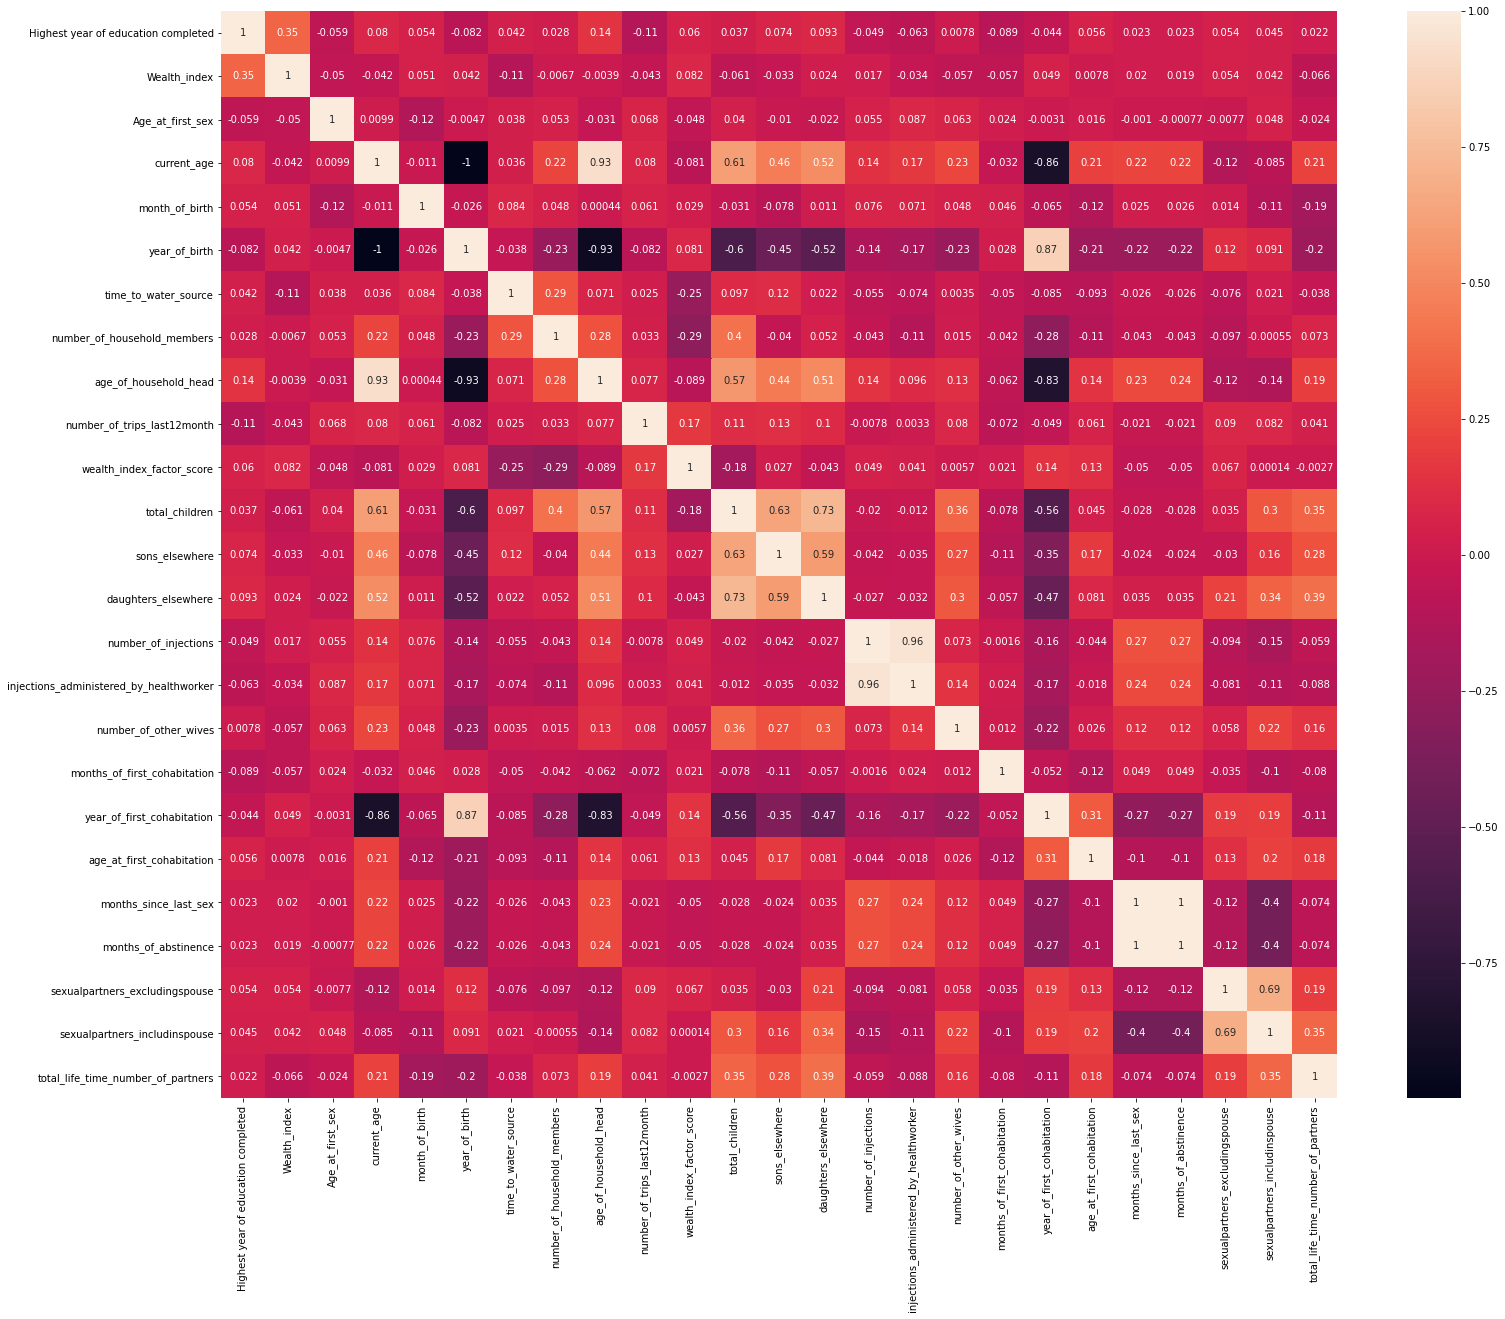

In [34]:
#let's now look at the correlation heatmap
#matrix = np.triu(dat.corr())
plt.figure(figsize = (25,20))
sns.heatmap(dat.iloc[:,:25].corr(), annot=True)

In [35]:
#from pandas_profiling import ProfileReport

#explore the data below
#profile = ProfileReport(dat, title='Pandas Profiling Report')#, explorative=True)

#profile = ProfileReport(dat, title='Pandas Profiling Report', minimal= True)

In [36]:
#let's now look at the report and see what we can learn from it.
#this report does a good job of showing us some things we may have missed like high cardinality

#profile.to_widgets()
#profile.to_file("output.html")


# Major Note

` This dataset I am working with here below includes all age groups that is from 5yrs to 99yrs so the process below should be taken as an example of what will happen once we have agreed on methods of increasing the data in the minority class `

` We have about 2k observations before we remove the age groups that we are not going to work with. `

A good question would be, do we do the synthetic data after separating the ages or before, the idea would be to make as many synthetic data points as possible.


## To do:

- Review and compare the labeling models in order to come up with a working dataset.
- Perform correlation evaluation based on the working dataset followed by a group evaluation{entire team}.
- There may be an imbalance in the data classes where we shall implement SMOTE  to create more synthetic data before we make our first model.
- After building the model we shall use it to produce a probabilistic evaluation of the risk and also evaluate the weight each factor contributes.
- Have a call with the rest of the team to evaluate our first iteration then make corrections where needed.

In [37]:
dat.label.value_counts()

1.0    230
0.0     22
Name: label, dtype: int64

<AxesSubplot:title={'center':'Class Imbalance'}, xlabel='Count', ylabel='Class'>

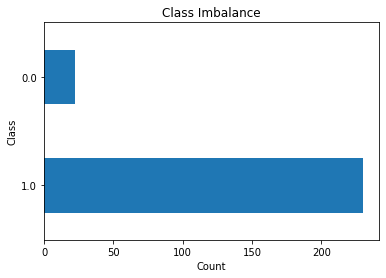

In [38]:
#lets visulize the imbalance
plt.title("Class Imbalance")
plt.xlabel("Count")
plt.ylabel("Class")
dat.label.value_counts().plot(kind='barh')

##### I have several options to deal with this data
- I can decide to do smote right now and create more data points
- I have also an option to first split the data and then do the smote later.

In [39]:
#lets start with option 2 as advised by Okello ::  I will do the other one later.
#first we shuffle the data

In [40]:
# before we go into splitting the data lets shuffle it abit

# this is to avoid the same class being in one part of the data split below.

dt = dat.sample(frac=1).reset_index(drop=True)

In [41]:
dt.shape

(252, 363)

In [42]:
from sklearn.model_selection import train_test_split

#right now what I am doing is splitting the data into two parts the test and then the train

train, test = train_test_split(dt, test_size = 0.3, shuffle = False, random_state = 42 )

#this will split the data but maintain the imbalance in the data class as before.

In [43]:
#let's check the shapes of the data
train.shape, test.shape

((176, 363), (76, 363))

In [44]:
#as seen the class is still not balanced
# we are going to work with this train set to do smote
train.label.value_counts()

1.0    161
0.0     15
Name: label, dtype: int64

In [45]:
#the same can be seen in the test class.
test.label.value_counts()

1.0    69
0.0     7
Name: label, dtype: int64

In [46]:
#now we are going to take x and y apart from the training set

y = train.label
x = train.drop(columns='label')

### Split :: stratify = y

Here i a splitting the data based on the contents of y, that is it will split equally the data and not put one of the class in one side only and the rest of the split is left without classes.

In [47]:
#now let us split the data into xtrain and ytrain, 
#I am using the stratify equal to y so that we don't have one class more in one than the other
#then we smote
test_size = 0.20

seed=42

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=test_size,random_state=seed, stratify = y)

In [48]:
X_train.shape, X_test.shape,Y_train.shape, Y_test.shape

((140, 362), (36, 362), (140,), (36,))

In [49]:
#call the SMOTE library
from imblearn.over_sampling import SMOTE

In [50]:
#smote
#the strategy used here is to make synthetic data points of the minority class ie: oversample.
smote = SMOTE(random_state=42,sampling_strategy='minority',n_jobs=-1,k_neighbors=6)


In [51]:
#now we are going to do SMOTE for this data that we will use in modeling
X_sm, y_sm = smote.fit_sample(X_train, Y_train)

In [52]:
#let's check and see the number of os and ones
#what we are trying to achieve is to have an equal number of class points in the data, this helps our algorithm not to learn
#in a skewed way  because one class is more than the other.

print('After OverSampling, the shape of train_X: {}'.format(X_sm.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_sm.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_sm==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_sm==0)))

After OverSampling, the shape of train_X: (256, 362)
After OverSampling, the shape of train_y: (256,) 

After OverSampling, counts of label '1': 128
After OverSampling, counts of label '0': 128


In [53]:
#we have one issue, the data which was created is at the bottom of the dataset so we need to shuffle
X_sm['label']= y_sm

In [54]:
# now we are going to use #shuffling the df because the created points are at the end of the df
from sklearn.utils import shuffle

data = shuffle(X_sm)

In [55]:
#we now do the splitting again of the datasets X and Y
y_ = data['label']
x_ = data.drop(columns=['label'])

In [56]:
#at this point we are now ready to call in the logistic regression model in order to get the 
#first draft of the model and calculate the risk finally.

# Modeling

At this point we are going to apply the data to a model and see how it behaves, the idea is to build the model and then apply it to the whole dataset to see what responses we get.

## Base Model

In [57]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression



In [58]:
#randomising the data
#this helps in reproduceability of the code
random_state = 42

In [59]:
model = LogisticRegression(random_state=random_state)
model.fit(x_,y_)

LogisticRegression(random_state=42)

Confusion_Matrix
[[ 2 15]
 [ 1 18]]


Model Accuracy
0.5555555555555556


ROC Area Under A Curve Score
0.5325077399380804




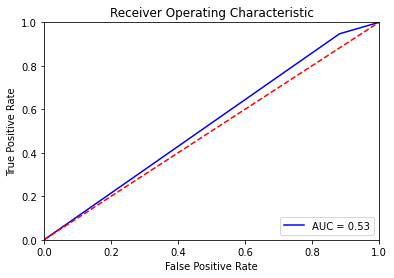

In [60]:
from sklearn.metrics import confusion_matrix,accuracy_score, roc_auc_score, roc_curve, auc
print("Confusion_Matrix")
print(confusion_matrix(model.predict(X_test),Y_test))
print('\n')
print("Model Accuracy")
print(accuracy_score(model.predict(X_test),Y_test))
print('\n')
print("ROC Area Under A Curve Score")
print(roc_auc_score(model.predict(X_test),Y_test))

print("\n")
fpr, tpr, threshold = roc_curve(model.predict(X_test),Y_test)
roc_auc = auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Second Model

The first thing i am going to try is to normalize the data, I can see that the data is on different scales and therefore I need to put it in the same scale, we can look at the sample dataframe below, see if you notice the different scales in the data.

In [61]:
x_.head()
#as you can see the scale on the year of birth and wealth_index are different, lets make all the same scale using a standard scaler

,Highest year of education completed,Wealth_index,Age_at_first_sex,current_age,month_of_birth,year_of_birth,time_to_water_source,number_of_household_members,age_of_household_head,number_of_trips_last12month,...,who_can_give_u_hiv_commercial sex partner,who_can_give_u_hiv_don't know,who_can_give_u_hiv_spouse,who_can_give_u_hiv_stranger,respondent_circumised_no,respondent_circumised_yes,paid_for_sex_last_12months_no,paid_for_sex_last_12months_yes,Gender_Female,Gender_Male
45,3.000000,3.000000,14.000000,24.000000,8.000000,1986.000000,45.000000,2.000000,24.000000,10.136967,...,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.0,0,1.0,0.0
53,1.000000,4.000000,18.000000,25.000000,9.000000,1985.000000,90.000000,6.000000,25.000000,6.358785,...,0.000000,0.000000,1.000000,0.0,1.000000,0.000000,1.0,0,1.0,0.0
161,2.294862,4.647431,18.352569,20.647431,4.467982,1990.000000,52.870414,2.942293,20.647431,4.950772,...,0.000000,0.647431,0.352569,0.0,0.647431,0.352569,1.0,0,1.0,0.0
40,1.000000,4.000000,21.000000,55.000000,1.000000,1956.000000,40.000000,11.000000,55.000000,6.000000,...,0.000000,1.000000,0.000000,0.0,1.000000,0.000000,1.0,0,1.0,0.0
233,2.190984,2.595492,16.213524,34.359427,8.763935,1976.045081,51.518435,3.809016,35.954919,8.915132,...,0.595492,0.000000,0.000000,0.0,0.000000,0.595492,0.0,0,1.0,0.0


In [62]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))

scaler.fit(X_train)
X_tr = scaler.transform(x_)
X_te = scaler.transform(X_test)

In [63]:
#let's take a look at the scales now
pd.DataFrame(X_tr).head(3) #as you can see the data scales have changed.
#this is normally good when you are using an algorithm with a linear kernel.

,0,1,2,3,4,5,6,7,8,9,...,352,353,354,355,356,357,358,359,360,361
0,0.428571,0.500000,0.145833,0.186047,0.636364,0.795455,0.091858,0.100000,0.166667,0.318297,...,0.0,0.000000,1.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.142857,0.750000,0.187500,0.209302,0.727273,0.772727,0.185804,0.500000,0.190476,0.269574,...,0.0,0.000000,1.000000,0.0,1.000000,0.000000,1.0,0.0,0.0,0.0
2,0.327837,0.911858,0.191173,0.108080,0.315271,0.886364,0.108289,0.194229,0.086844,0.251417,...,0.0,0.647431,0.352569,0.0,0.647431,0.352569,1.0,0.0,0.0,0.0


In [64]:
#now lets do the modeling again
model.fit(X_tr,y_)

LogisticRegression(random_state=42)

Confusion_Matrix
[[ 3  0]
 [ 0 33]]


Model Accuracy
1.0


ROC Area Under A Curve Score
1.0




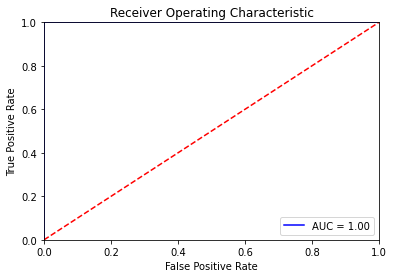

In [65]:
from sklearn.metrics import confusion_matrix,accuracy_score, roc_auc_score, roc_curve, auc
print("Confusion_Matrix")
print(confusion_matrix(model.predict(X_te),Y_test))
print('\n')
print("Model Accuracy")
print(accuracy_score(model.predict(X_te),Y_test))
print('\n')
print("ROC Area Under A Curve Score")
print(roc_auc_score(model.predict(X_te),Y_test))

print("\n")
fpr, tpr, threshold = roc_curve(model.predict(X_te),Y_test)
roc_auc = auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## The best algorithm

When I ge the algorithm with the best accuracy then i will apply it  to the rest of the dataset.

In [66]:
#So as a draft I am going to run the same algorithm on the whole dataset
risk = model.predict(dt.drop(columns='label'))

In [67]:
dt['Logistic_prediction'] = risk

In [68]:
dt.head()

,Highest year of education completed,Wealth_index,Age_at_first_sex,current_age,month_of_birth,year_of_birth,time_to_water_source,number_of_household_members,age_of_household_head,number_of_trips_last12month,...,who_can_give_u_hiv_spouse,who_can_give_u_hiv_stranger,respondent_circumised_no,respondent_circumised_yes,paid_for_sex_last_12months_no,paid_for_sex_last_12months_yes,Gender_Female,Gender_Male,label,Logistic_prediction
0,1.0,1.0,24.0,29.0,11.0,1981.0,39.326079,2.0,30.0,15.0,...,0.0,0.0,0.0,0.0,0.0,0,1.0,0.0,1.0,0.0
1,1.0,4.0,16.0,32.0,4.0,1979.0,10.000000,7.0,32.0,2.0,...,0.0,0.0,0.0,1.0,1.0,0,1.0,0.0,1.0,1.0
2,1.0,4.0,13.0,35.0,12.0,1975.0,5.000000,2.0,22.0,30.0,...,0.0,0.0,1.0,0.0,1.0,0,1.0,0.0,0.0,1.0
3,1.0,2.0,16.0,25.0,2.0,1986.0,45.000000,5.0,30.0,6.0,...,0.0,0.0,1.0,0.0,1.0,0,1.0,0.0,1.0,0.0
4,1.0,1.0,16.0,36.0,10.0,1974.0,30.000000,2.0,38.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0,1.0,0.0,1.0,0.0


In [69]:
risk = model.predict_proba(dt.drop(columns=['label','Logistic_prediction']))

In [70]:
risk

array([[1.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 0.00000000e+00],
       [0.000000

#I want to separate the values and take the greater
#first I will make the ndarray series
a = pd.DataFrame(risk).iloc[:,0]
b = pd.DataFrame(risk).iloc[:,1]


## Note:

I need to build the algorithm better so that the accuracy will be higher.

In [71]:
df = pd.DataFrame(risk,columns=['Probability_No','Probability_Yes'])

In [72]:
#I am exporting this dataframe in csv so that I can be able to work with it outside this envrionment
#I want to achieve the process of building the threshold and i have methods that don't work here
#pd.concat([dt,df], axis=1).to_csv("out.csv",index = False)

In [73]:
#in this cell i would like to make a comparison of two arrays and then take the one with a higher value
#this will help me compare what probability extent the machine used to predict what it did.
#df['fin'] = np.where(df['Probability_No']>df['Probability_Yes'], df['Probability_No'], df['Probability_Yes'])

# Note

We need to have a discussion with the doctors on how to distribute the risks in this case.

Should it be as below:

- 0-0.35 - Low Risk
- 0.35 < 0.75 - Medium Risk
- 0.75 + - Very High Risk.

What can contribute to the way we need to answer this question?

# Update:

Since tuning the logistic model :
- I used a standard scaler on all the variables and then the model was able to learn properly.
- I got a high accuracy and a good roc score of 100 ("this is stil experimental because I have not sorted some data issues")
- I believe we can learn from this process to know what kind of questions to ask ourselves and how we will approch the answers.

In [74]:
df.loc[(df.Probability_Yes < 0.35) , 'label'] = "Low Risk" 
df.loc[(df.Probability_Yes >= 0.35) & (df.Probability_Yes < 0.75) , 'label'] = "Medium Risk" 
df.loc[(df.Probability_Yes >= 0.75) , 'label'] = "High Risk" 


In [75]:
df.head()
#my question would be here :: do we do an average score on the probability


,Probability_No,Probability_Yes,label
0,1.0,0.0,Low Risk
1,0.0,1.0,High Risk
2,0.0,1.0,High Risk
3,1.0,0.0,Low Risk
4,1.0,0.0,Low Risk


In [76]:
#lets take the value counts and plot a graph also
df.label.value_counts()

High Risk    127
Low Risk     125
Name: label, dtype: int64

<AxesSubplot:>

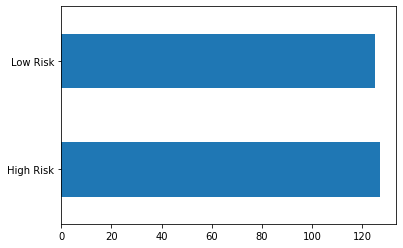

In [77]:
df.label.value_counts().plot(kind = 'barh')

In [78]:
#let us check if the probability yes column has the right ranges of numbers.
df.Probability_Yes.describe() #great

count    252.000000
mean       0.503968
std        0.500979
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Probability_Yes, dtype: float64

## Note:

Please note that the logistic prediction and the label may differ because the model is not yet finely tuned.

In [79]:
dt.head()



,Highest year of education completed,Wealth_index,Age_at_first_sex,current_age,month_of_birth,year_of_birth,time_to_water_source,number_of_household_members,age_of_household_head,number_of_trips_last12month,...,who_can_give_u_hiv_spouse,who_can_give_u_hiv_stranger,respondent_circumised_no,respondent_circumised_yes,paid_for_sex_last_12months_no,paid_for_sex_last_12months_yes,Gender_Female,Gender_Male,label,Logistic_prediction
0,1.0,1.0,24.0,29.0,11.0,1981.0,39.326079,2.0,30.0,15.0,...,0.0,0.0,0.0,0.0,0.0,0,1.0,0.0,1.0,0.0
1,1.0,4.0,16.0,32.0,4.0,1979.0,10.000000,7.0,32.0,2.0,...,0.0,0.0,0.0,1.0,1.0,0,1.0,0.0,1.0,1.0
2,1.0,4.0,13.0,35.0,12.0,1975.0,5.000000,2.0,22.0,30.0,...,0.0,0.0,1.0,0.0,1.0,0,1.0,0.0,0.0,1.0
3,1.0,2.0,16.0,25.0,2.0,1986.0,45.000000,5.0,30.0,6.0,...,0.0,0.0,1.0,0.0,1.0,0,1.0,0.0,1.0,0.0
4,1.0,1.0,16.0,36.0,10.0,1974.0,30.000000,2.0,38.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0,1.0,0.0,1.0,0.0


In [80]:
dt.shape

(252, 364)

In [81]:
#now I am going to add the actual probability predicted
dt['Label'] = df['label']
dt["Probab_no"] = df['Probability_No']
dt["Probab_yes"] = df["Probability_Yes"]

In [82]:
dt.head()

,Highest year of education completed,Wealth_index,Age_at_first_sex,current_age,month_of_birth,year_of_birth,time_to_water_source,number_of_household_members,age_of_household_head,number_of_trips_last12month,...,respondent_circumised_yes,paid_for_sex_last_12months_no,paid_for_sex_last_12months_yes,Gender_Female,Gender_Male,label,Logistic_prediction,Label,Probab_no,Probab_yes
0,1.0,1.0,24.0,29.0,11.0,1981.0,39.326079,2.0,30.0,15.0,...,0.0,0.0,0,1.0,0.0,1.0,0.0,Low Risk,1.0,0.0
1,1.0,4.0,16.0,32.0,4.0,1979.0,10.000000,7.0,32.0,2.0,...,1.0,1.0,0,1.0,0.0,1.0,1.0,High Risk,0.0,1.0
2,1.0,4.0,13.0,35.0,12.0,1975.0,5.000000,2.0,22.0,30.0,...,0.0,1.0,0,1.0,0.0,0.0,1.0,High Risk,0.0,1.0
3,1.0,2.0,16.0,25.0,2.0,1986.0,45.000000,5.0,30.0,6.0,...,0.0,1.0,0,1.0,0.0,1.0,0.0,Low Risk,1.0,0.0
4,1.0,1.0,16.0,36.0,10.0,1974.0,30.000000,2.0,38.0,2.0,...,0.0,0.0,0,1.0,0.0,1.0,0.0,Low Risk,1.0,0.0


In [92]:
dt.head()

,Highest year of education completed,Wealth_index,Age_at_first_sex,current_age,month_of_birth,year_of_birth,time_to_water_source,number_of_household_members,age_of_household_head,number_of_trips_last12month,...,paid_for_sex_last_12months_no,paid_for_sex_last_12months_yes,Gender_Female,Gender_Male,label,Logistic_prediction,Label,Probab_no,Probab_yes,hiv_result
0,1.0,1.0,24.0,29.0,11.0,1981.0,39.326079,2.0,30.0,15.0,...,0.0,0,1.0,0.0,1.0,0.0,Low Risk,1.0,0.0,0.0
1,1.0,4.0,16.0,32.0,4.0,1979.0,10.000000,7.0,32.0,2.0,...,1.0,0,1.0,0.0,1.0,1.0,High Risk,0.0,1.0,NaN
2,1.0,4.0,13.0,35.0,12.0,1975.0,5.000000,2.0,22.0,30.0,...,1.0,0,1.0,0.0,0.0,1.0,High Risk,0.0,1.0,NaN
3,1.0,2.0,16.0,25.0,2.0,1986.0,45.000000,5.0,30.0,6.0,...,1.0,0,1.0,0.0,1.0,0.0,Low Risk,1.0,0.0,NaN
4,1.0,1.0,16.0,36.0,10.0,1974.0,30.000000,2.0,38.0,2.0,...,0.0,0,1.0,0.0,1.0,0.0,Low Risk,1.0,0.0,NaN


In [83]:
dt.to_csv("labeled_5.csv", index = False)

In [88]:
hiv

,blood_test_result
0,0.0
7,0.0
15,0.0
29,0.0
37,0.0
...,...
2252,0.0
2254,0.0
2260,0.0
2278,0.0


In [87]:
dt["hiv_result"]

0      0.0
1      NaN
2      NaN
3      NaN
4      NaN
      ... 
247    NaN
248    NaN
249    NaN
250    NaN
251    NaN
Name: hiv_result, Length: 252, dtype: float64

In [90]:
pd.crosstab(dt["Logistic_prediction"],dt["hiv_result"],margins=True)

hiv_result,0.0,1.0,All
Logistic_prediction,,,
0.0,19,2,21
1.0,7,2,9
All,26,4,30


# To-do

- I have to make the algorithm better by tunning it alittle
- I have to assess how each value is contributing to the weight of the data.
- I will now run the same algorithm using the information that i got from the training process but this time i will be using the values predicted and treat this as a regression problem or take more advise from the data team.
- I have to use the data to build how the thresholds are going to look like.

This [Article](https://www.datacamp.com/community/tutorials/probability-distributions-python) is very informative

In [81]:
thr = pd.read_csv("out.csv")

In [82]:
thr.columns

Index(['Highest year of education completed', 'Wealth_index',
       'Age_at_first_sex', 'current_age', 'month_of_birth', 'year_of_birth',
       'time_to_water_source', 'number_of_household_members',
       'age_of_household_head', 'number_of_trips_last12month',
       ...
       'respondent_circumised_no', 'respondent_circumised_yes',
       'paid_for_sex_last_12months_no', 'paid_for_sex_last_12months_yes',
       'Gender_Female', 'Gender_Male', 'label', 'Logistic_prediction',
       'Probability_No', 'Probability_Yes'],
      dtype='object', length=367)

#### Note:-
This result below needs to be evaluated so that we can see if it makes sense at all. I used a cumulative distribution function because it helps us see what percentage of the information is below what value.

(array([0.00519481, 0.00519481, 0.00519481, 0.00519481, 0.00519481,
        0.00519481, 0.00519481, 0.00606061, 0.00865801, 0.02077922,
        0.02510823, 0.02597403, 0.03376623, 0.04415584, 0.46753247,
        0.75064935, 0.91774892, 0.97748918, 0.99393939, 1.        ]),
 array([0.07816614, 0.10642869, 0.13469123, 0.16295378, 0.19121632,
        0.21947886, 0.24774141, 0.27600395, 0.3042665 , 0.33252904,
        0.36079159, 0.38905413, 0.41731668, 0.44557922, 0.47384177,
        0.50210431, 0.53036686, 0.5586294 , 0.58689195, 0.61515449,
        0.64341704]),
 [<matplotlib.patches.Polygon at 0x7f010c7342b0>])

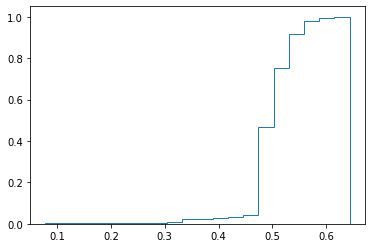

In [87]:
#I need to show this to Dr. Agnes to see if any sense can be made out of this method
plt.hist(thr.Probability_Yes, bins = 20, density = True, cumulative=True, histtype= 'step')